# load in model

from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn import model_selection
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import pandas as pd
import numpy as np
np.random.seed(10)

# plot function

In [2]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train_histroy')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

# load data

In [3]:
import glob
filelist = sorted(glob.glob('/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/*.jpg'))

In [4]:
filelist

['/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170620-20170710 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170627-20170717 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170704-20170724 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170711-20170731 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170718-20170807 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170725-20170814 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170801-20170821 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170808-20170828 2330.jpg',
 '/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170815-20170904 233

In [5]:
x = np.array([np.array(Image.open(fname)) for fname in filelist])

In [6]:
x.shape

(50, 615, 1432, 3)

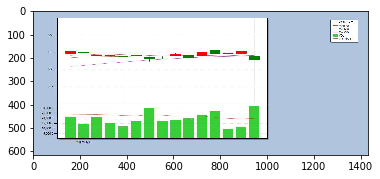

In [7]:
plt.imshow(x[20], cmap='gray')

In [8]:
Y = pd.read_csv("/Users/tyyeh/Documents/Documents - TengYuanYEH MacBook Air/bigdata/final project/20170620-201806180-2330-chinese-v7.csv")
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
close    50 non-null int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [9]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(x, Y, test_size = 0.3)

In [10]:
train_X.shape

(35, 615, 1432, 3)

# x_train normalize & 4D matrix

In [11]:
x_train4D = train_X.reshape(train_X.shape[0], 615, 1432, 3).astype('float64')
x_test4D = test_X.reshape(test_X.shape[0], 615, 1432, 3).astype('float64')

In [12]:
x_train4D

array([[[[  0.,   0.,  12.],
         [  9.,  12.,  27.],
         [  0.,   0.,  14.],
         ...,
         [  0.,   0.,  23.],
         [  6.,  13.,  29.],
         [  0.,   0.,   9.]],

        [[ 17.,  20.,  35.],
         [165., 171., 185.],
         [189., 195., 211.],
         ...,
         [187., 195., 218.],
         [164., 171., 189.],
         [ 17.,  21.,  30.]],

        [[  0.,   0.,  14.],
         [192., 198., 214.],
         [203., 210., 226.],
         ...,
         [202., 210., 233.],
         [191., 198., 216.],
         [  0.,   0.,   9.]],

        ...,

        [[  0.,   2.,  19.],
         [180., 193., 210.],
         [193., 206., 223.],
         ...,
         [194., 206., 218.],
         [183., 193., 203.],
         [  0.,   1.,   9.]],

        [[  4.,  14.,  26.],
         [160., 170., 182.],
         [197., 207., 219.],
         ...,
         [199., 206., 214.],
         [162., 169., 175.],
         [  8.,  13.,  19.]],

        [[  0.,   2.,   9.],
       

In [13]:
x_train4D_normalize = x_train4D / 255 #normailize
x_test4D_normalize = x_test4D/ 255

In [14]:
x_train4D_normalize

array([[[[0.        , 0.        , 0.04705882],
         [0.03529412, 0.04705882, 0.10588235],
         [0.        , 0.        , 0.05490196],
         ...,
         [0.        , 0.        , 0.09019608],
         [0.02352941, 0.05098039, 0.11372549],
         [0.        , 0.        , 0.03529412]],

        [[0.06666667, 0.07843137, 0.1372549 ],
         [0.64705882, 0.67058824, 0.7254902 ],
         [0.74117647, 0.76470588, 0.82745098],
         ...,
         [0.73333333, 0.76470588, 0.85490196],
         [0.64313725, 0.67058824, 0.74117647],
         [0.06666667, 0.08235294, 0.11764706]],

        [[0.        , 0.        , 0.05490196],
         [0.75294118, 0.77647059, 0.83921569],
         [0.79607843, 0.82352941, 0.88627451],
         ...,
         [0.79215686, 0.82352941, 0.91372549],
         [0.74901961, 0.77647059, 0.84705882],
         [0.        , 0.        , 0.03529412]],

        ...,

        [[0.        , 0.00784314, 0.0745098 ],
         [0.70588235, 0.75686275, 0.82352941]

In [15]:
y_trainOneHot = np_utils.to_categorical(train_y)
y_testOneHot = np_utils.to_categorical(test_y)

# establish CNN model

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(filters=36,
                kernel_size = (5,5),
                padding = 'same',
                input_shape=(615, 1432, 3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding= 'same',
                activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

In [25]:
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam', metrics=['accuracy'])

# input train data in CNN

In [28]:
train_history = model.fit(x= x_train4D,y= y_trainOneHot,
                          validation_split=0.3,epochs=5,
                          batch_size=300, verbose=2)

Train on 24 samples, validate on 11 samples
Epoch 1/5
 - 212s - loss: 7.0771 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/5
 - 206s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/5
 - 183s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/5
 - 180s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/5
 - 208s - loss: 2.6863 - acc: 0.8333 - val_loss: 1.1921e-07 - val_acc: 1.0000


# show train history

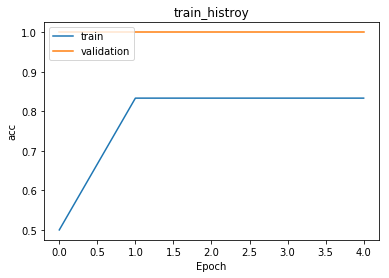

In [29]:
show_train_history(train_history,'acc','val_acc')

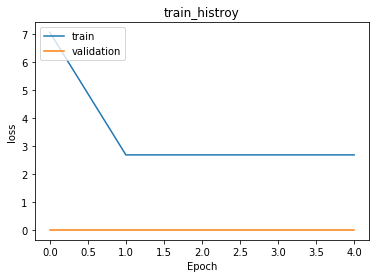

In [30]:
show_train_history(train_history,'loss','val_loss')

# predict score

In [31]:
scores = model.evaluate(x_test4D_normalize, y_testOneHot)

15/15 [==============================] - 37s 2s/step


In [32]:
scores[1]

0.8666666746139526